## Provide Insights For Telangana Government Tourism 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# Define the folders containing the CSV files
domestic_folder = 'domestic_visitors'
foreign_folder = 'foreign_visitors'

In [3]:
# Define the absolute file path of the folder
domestic_folder = r'D:\Data Analysis\C5 Input for participants\domestic_visitors'
foreign_folder = r'D:\Data Analysis\C5 Input for participants\foreign_visitors'

In [4]:
# Function to read and concatenate CSV files
def read_and_concatenate(folder_path):
    dfs = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".csv"):
            file_path = os.path.join(folder_path, filename)
            df = pd.read_csv(file_path)
            dfs.append(df)
    result = pd.concat(dfs, ignore_index=True)
    return result

In [5]:
# Read and concatenate domestic visitor files
domestic_visitors = read_and_concatenate(domestic_folder)

In [6]:
# Read and concatenate foreign visitor files
foreign_visitors = read_and_concatenate(foreign_folder)

In [7]:
# Filter data for years 2016 to 2019
domestic_visitors = domestic_visitors[domestic_visitors["year"].between(2016, 2019)]
foreign_visitors = foreign_visitors[foreign_visitors["year"].between(2016, 2019)]

In [8]:
# Write merged dataframes to CSV files
domestic_visitors.to_csv("domestic_visitors.csv", index=False)
foreign_visitors.to_csv("foreign_visitors.csv", index=False)

In [9]:
print("Merged files saved as 'domestic_visitors.csv' and 'foreign_visitors.csv'.")

Merged files saved as 'domestic_visitors.csv' and 'foreign_visitors.csv'.


In [10]:
# Load merged data into a DataFrame
domestic_visitors = pd.read_csv("C:/Users/dell/domestic_visitors.csv")
foreign_visitors = pd.read_csv("C:/Users/dell/foreign_visitors.csv")

In [11]:
domestic_visitors.head()

,district,date,month,year,visitors
0,Adilabad,01-01-2016,January,2016,792136
1,Adilabad,01-02-2016,February,2016,937820
2,Adilabad,01-03-2016,March,2016,582946
3,Adilabad,01-04-2016,April,2016,341948
4,Adilabad,01-05-2016,May,2016,252887


In [12]:
foreign_visitors.head()

,district,date,month,year,visitors
0,Adilabad,01-01-2016,January,2016,2
1,Adilabad,01-02-2016,February,2016,0
2,Adilabad,01-03-2016,March,2016,2
3,Adilabad,01-04-2016,April,2016,0
4,Adilabad,01-05-2016,May,2016,0


In [13]:
domestic_visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   district  1512 non-null   object
 1   date      1512 non-null   object
 2   month     1512 non-null   object
 3   year      1512 non-null   int64 
 4   visitors  1482 non-null   object
dtypes: int64(1), object(4)
memory usage: 59.2+ KB


In [14]:
foreign_visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   district  1512 non-null   object
 1   date      1512 non-null   object
 2   month     1512 non-null   object
 3   year      1512 non-null   int64 
 4   visitors  1512 non-null   object
dtypes: int64(1), object(4)
memory usage: 59.2+ KB


In [15]:
domestic_visitors.dtypes

district    object
date        object
month       object
year         int64
visitors    object
dtype: object

In [16]:
foreign_visitors.dtypes

district    object
date        object
month       object
year         int64
visitors    object
dtype: object

In [17]:
# Convert the 'visitors' column to numerical data type
domestic_visitors['visitors'] = pd.to_numeric(domestic_visitors['visitors'], errors='coerce', downcast='integer')

In [18]:
# Convert the 'visitors' column to numerical data type
foreign_visitors['visitors'] = pd.to_numeric(foreign_visitors['visitors'], errors='coerce', downcast='integer')

In [19]:
domestic_visitors.isnull().sum()

district      0
date          0
month         0
year          0
visitors    345
dtype: int64

In [20]:
foreign_visitors.isnull().sum()

district      0
date          0
month         0
year          0
visitors    320
dtype: int64

In [21]:
# Fill missing values with mean
domestic_visitors['visitors'].fillna(domestic_visitors['visitors'].mean(), inplace=True)

In [22]:
# Fill missing values with mean
foreign_visitors['visitors'].fillna(foreign_visitors['visitors'].mean(), inplace=True)

In [23]:
domestic_visitors.isnull().sum()

district    0
date        0
month       0
year        0
visitors    0
dtype: int64

In [24]:
foreign_visitors.isnull().sum()

district    0
date        0
month       0
year        0
visitors    0
dtype: int64

###### 1.List down the top 10 districts that have the highest number of domestic visitors overall (2016 - 2019)?

In [25]:
# Group the data by district and sum the visitors for each district
district_data = domestic_visitors.groupby('district')['visitors'].sum().reset_index()

In [26]:
# Sort the data in descending order to get the top districts
top_10_districts = district_data.nlargest(10, 'visitors')

In [27]:
# Print the top 10 districts with the highest number of domestic visitors overall
print("Top 10 districts with the highest number of domestic visitors overall (2016-2019):")
print(top_10_districts)

Top 10 districts with the highest number of domestic visitors overall (2016-2019):
                    district      visitors
2                  Hyderabad  8.390096e+07
23         Rajanna Sircilla   4.451141e+07
31          Warangal (Urban)  3.072660e+07
32           Yadadri Bhongir  2.964122e+07
1      Bhadradri Kothagudem   2.434910e+07
5   Jayashankar Bhoopalpally  2.238100e+07
14                    Medak   2.054264e+07
12               Mahbubnagar  1.718012e+07
20                    Nirmal  1.606393e+07
15                  Medchal   1.465673e+07


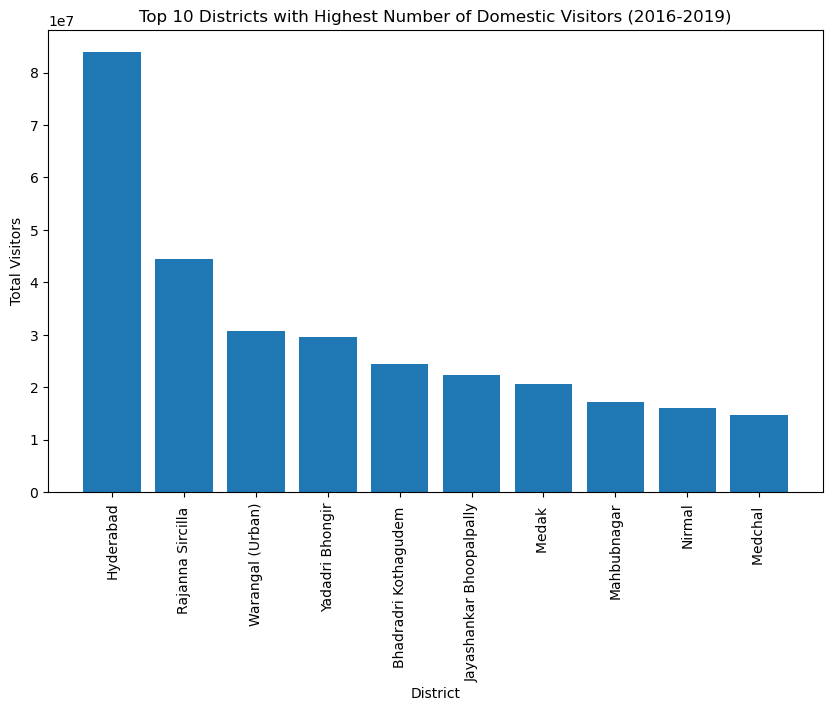

In [28]:
# Create a bar chart using Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(top_10_districts['district'], top_10_districts['visitors'])
plt.xlabel('District')
plt.ylabel('Total Visitors')
plt.title('Top 10 Districts with Highest Number of Domestic Visitors (2016-2019)')
plt.xticks(rotation=90)
plt.show()

###### 2. List down the top 3 districts based on compounded annual growth rate (CAGR) of visitors between (2016 - 2019)?

In [29]:
# Calculate the percentage change for visitors column
domestic_visitors["AGR"] = domestic_visitors.groupby("district")["visitors"].pct_change()

In [30]:
# Add 1 to the percentage change to get the annual growth rate (AGR)
domestic_visitors["AGR"] = domestic_visitors["AGR"] + 1

In [31]:
# Group data by district and calculate the compounded annual growth rate (CAGR)
domestic_visitors_grouped = domestic_visitors.groupby("district").agg({"AGR": lambda x: x.prod() - 1})

In [32]:
# Replace inf (undefined) values with the mean of non-inf values
mean_cagr = domestic_visitors_grouped[domestic_visitors_grouped["AGR"] != float('inf')]["AGR"].mean()
domestic_visitors_grouped.replace(float('inf'), mean_cagr, inplace=True)

In [33]:
# Sort the districts based on CAGR in descending order
domestic_visitors_grouped = domestic_visitors_grouped.sort_values(by="AGR", ascending=False).head(3)

In [34]:
# Reset index to convert district from index to column
domestic_visitors_grouped = domestic_visitors_grouped.reset_index()

In [35]:
# Display the top 3 districts based on CAGR of visitors
top_3_districts_cagr = domestic_visitors_grouped[["district", "AGR"]]
top_3_districts_cagr.columns = ["District", "CAGR"]
top_3_districts_cagr

,District,CAGR
0,Nizamabad,18.791667
1,Rajanna Sircilla,3.823345
2,Medak,2.787365


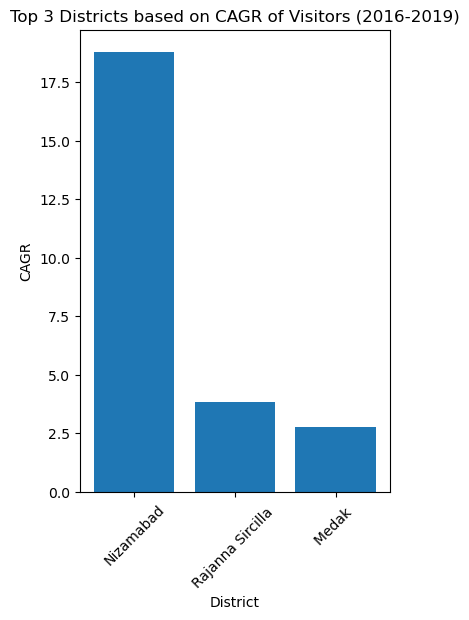

In [36]:
# Plotting bar chart
plt.figure(figsize=(4, 6))
plt.bar(top_3_districts_cagr["District"], top_3_districts_cagr["CAGR"])
plt.xlabel("District")
plt.ylabel("CAGR")
plt.title("Top 3 Districts based on CAGR of Visitors (2016-2019)")
plt.xticks(rotation=45)
plt.show()

###### 3. List down the bottom 3 districts based on compounded annual growth rate (CAGR) of visitors between (2016 - 2019)?

In [37]:
# Filter data for years 2016 to 2019
filtered_data = domestic_visitors[(domestic_visitors['year'] >= 2016) & (domestic_visitors['year'] <= 2019)]

In [38]:
# Group by district
grouped_data = filtered_data.groupby('district')

In [39]:
# Calculate CAGR for each district
cagr = ((grouped_data['visitors'].max() / grouped_data['visitors'].min())**(1/3)) - 1

In [40]:
# Sort districts based on CAGR in ascending order
bottom_3_districts = cagr.sort_values().head(3)

In [41]:
# Display the bottom 3 districts
print(bottom_3_districts)

district
Vikarabad      0.0
Ranga Reddy    0.0
Medchal        0.0
Name: visitors, dtype: float64


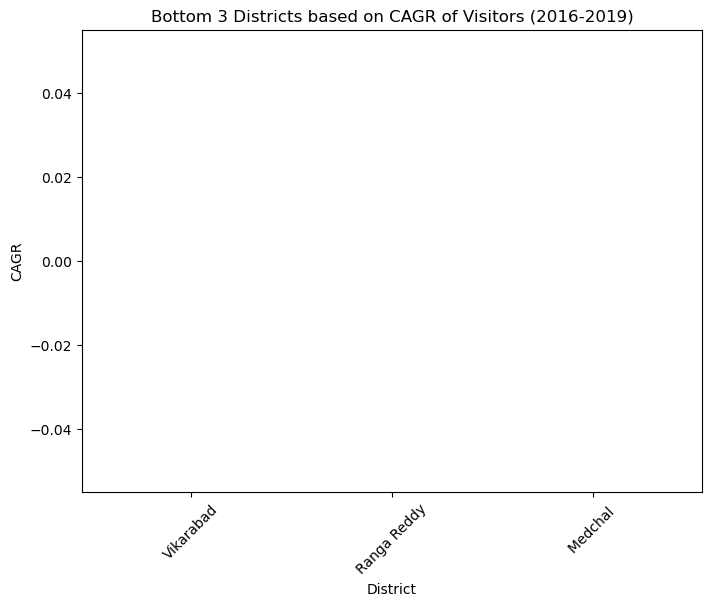

In [87]:
# Plotting bar chart
plt.figure(figsize=(8, 6))
plt.bar(bottom_3_districts.index, bottom_3_districts.values)
plt.xlabel("District")
plt.ylabel("CAGR")
plt.title("Bottom 3 Districts based on CAGR of Visitors (2016-2019)")
plt.xticks(rotation=45)
plt.show()

###### 4. What are the peak and low season months for Hyderabad based on the data from 2016 to 2019 for Hyderabad district?

In [43]:
# Filter data for years 2016 to 2019 and Hyderabad district
filtered_data = domestic_visitors[(domestic_visitors['year'] >= 2016) & (domestic_visitors['year'] <= 2019) & (domestic_visitors['district'] == 'Hyderabad')]

In [44]:
# Group by month and calculate average visitors
monthly_average_visitors = filtered_data.groupby('month')['visitors'].mean().reset_index()

In [45]:
# Sort by average visitors in descending order
peak_season_months = monthly_average_visitors.sort_values(by='visitors', ascending=False).head(1)
low_season_months = monthly_average_visitors.sort_values(by='visitors', ascending=True).head(1)

In [46]:
# Extract peak and low season months
peak_season_month = peak_season_months['month'].values[0]
low_season_month = low_season_months['month'].values[0]

In [47]:
# Display the peak and low season months
print("Peak season month for Hyderabad: ", peak_season_month)
print("Low season month for Hyderabad: ", low_season_month)

Peak season month for Hyderabad:  June
Low season month for Hyderabad:  February


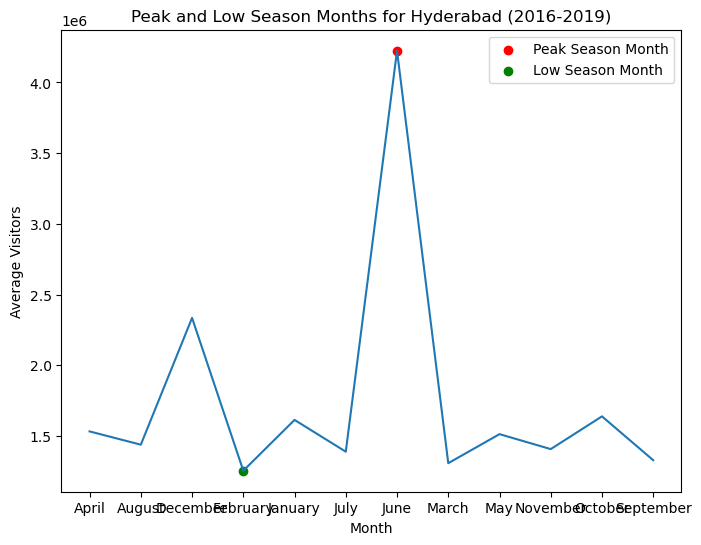

In [91]:
# Plotting line chart
plt.figure(figsize=(8, 6))
plt.plot(monthly_average_visitors['month'], monthly_average_visitors['visitors'])
plt.scatter(peak_season_month, peak_season_months['visitors'].values[0], color='red', label='Peak Season Month')
plt.scatter(low_season_month, low_season_months['visitors'].values[0], color='green', label='Low Season Month')
plt.xlabel("Month")
plt.ylabel("Average Visitors")
plt.title("Peak and Low Season Months for Hyderabad (2016-2019)")
plt.legend()
plt.show()

###### 5. Show the top & bottom 3 districts with high domestic to foreign tourist ratio?

In [49]:
# Merge the data based on district name
merged_df = domestic_visitors.merge(foreign_visitors, on='district')

In [50]:
# Write merged dataframes to CSV files
merged_df.to_csv("merged_df.csv", index=False)

In [51]:
# Replace empty string with NaN
merged_df['visitors_x'] = merged_df['visitors_x'].replace(' ', float('nan'))
merged_df['visitors_y'] = merged_df['visitors_y'].replace(' ', float('nan'))

# Convert columns to numeric data type
merged_df['visitors_x'] = pd.to_numeric(merged_df['visitors_x'])
merged_df['visitors_y'] = pd.to_numeric(merged_df['visitors_y'])

In [52]:
# Drop duplicate rows based on district_id
merged_dfd = merged_df.drop_duplicates(subset='district')

In [53]:
# Calculate the ratio of domestic to foreign tourists
merged_dfd['Domestic to Foreign Ratio'] = merged_dfd['visitors_x'] / merged_dfd['visitors_y']
# Replace inf values with NaN
merged_dfd['Domestic to Foreign Ratio'] = merged_dfd['Domestic to Foreign Ratio'].replace([np.inf, -np.inf], np.nan)
# Replace NaN values with mean of non-missing values
mean_ratio = merged_dfd['Domestic to Foreign Ratio'].mean()
merged_dfd['Domestic to Foreign Ratio'].fillna(mean_ratio, inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_18852\2717372478.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_dfd['Domestic to Foreign Ratio'] = merged_dfd['visitors_x'] / merged_dfd['visitors_y']
C:\Users\dell\AppData\Local\Temp\ipykernel_18852\2717372478.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_dfd['Domestic to Foreign Ratio'] = merged_dfd['Domestic to Foreign Ratio'].replace([np.inf, -np.inf], np.nan)
C:\Users\dell\AppData\Local\Temp\ipykernel_18852\2717372478.py:7: SettingWith

In [54]:
# Sort by ratio in descending order to get top districts
top_districts = merged_dfd.sort_values(by='Domestic to Foreign Ratio', ascending=False).head(3)

In [55]:
# Sort by ratio in ascending order to get bottom districts
bottom_districts = merged_dfd.sort_values(by='Domestic to Foreign Ratio', ascending=True).head(3)

In [56]:
# Display the top and bottom districts
print("Top 3 districts with high domestic to foreign tourist ratio: ")
print(top_districts[['district', 'Domestic to Foreign Ratio']])
print("\nBottom 3 districts with low domestic to foreign tourist ratio: ")
print(bottom_districts[['district', 'Domestic to Foreign Ratio']])

Top 3 districts with high domestic to foreign tourist ratio: 
          district  Domestic to Foreign Ratio
0         Adilabad              396068.000000
18432  Karimnagar                15873.528045
43776    Nizamabad               15873.528045

Bottom 3 districts with low domestic to foreign tourist ratio: 
          district  Domestic to Foreign Ratio
4608     Hyderabad                  70.753861
34560     Medchal                  343.406674
50688  Ranga Reddy                 343.406674


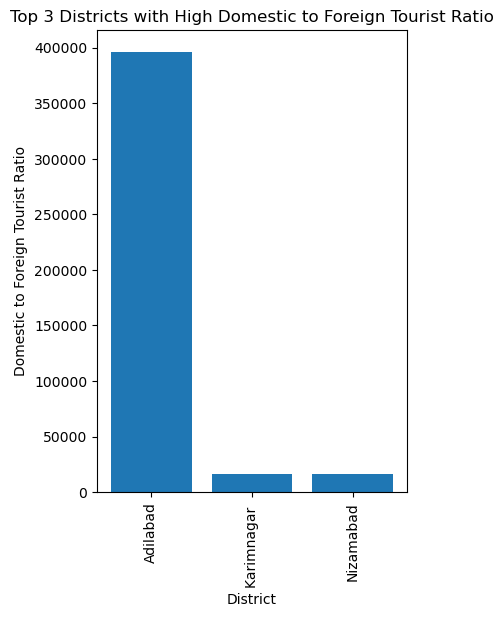

In [57]:
# Plotting bar chart for top districts
plt.figure(figsize=(4, 6))
plt.bar(top_districts['district'], top_districts['Domestic to Foreign Ratio'])
plt.xlabel("District")
plt.ylabel("Domestic to Foreign Tourist Ratio")
plt.title("Top 3 Districts with High Domestic to Foreign Tourist Ratio")
plt.xticks(rotation='vertical')
plt.show()

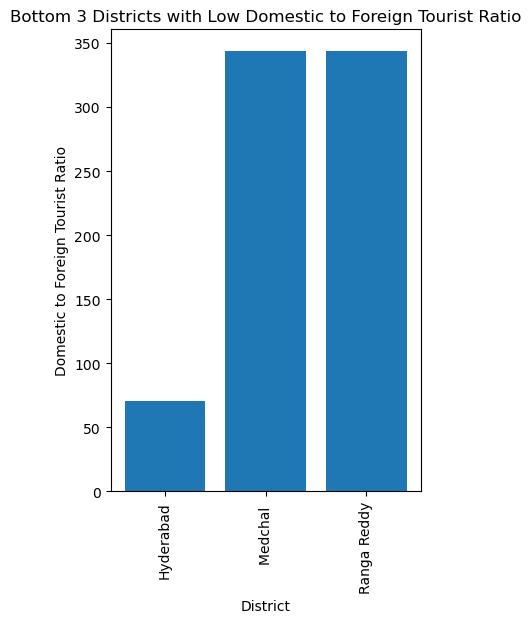

In [58]:
# Plotting bar chart for bottom districts
plt.figure(figsize=(4, 6))
plt.bar(bottom_districts['district'], bottom_districts['Domestic to Foreign Ratio'])
plt.xlabel("District")
plt.ylabel("Domestic to Foreign Tourist Ratio")
plt.title("Bottom 3 Districts with Low Domestic to Foreign Tourist Ratio")
plt.xticks(rotation='vertical')
plt.show()

###### 6. List the top & bottom 5 districts based on ‘population to tourist footfall ratio*’ ratio in 2019? 

In [59]:
# Load population merged data into a DataFrame
merged_dfP = pd.read_csv("D:\Data Analysis\C5 Input for participants\merged_dfP.csv", encoding='latin1')

In [60]:
merged_dfP.head()

,district,date_x,month_x,year_x,visitors_x,AGR,date_y,month_y,year_y,visitors_y,population
0,Adilabad,01-01-2016,January,2016,792136.0,NaN,01-01-2016,January,2016,2.0,708972
1,Adilabad,01-01-2016,January,2016,792136.0,NaN,01-02-2016,February,2016,0.0,708972
2,Adilabad,01-01-2016,January,2016,792136.0,NaN,01-03-2016,March,2016,2.0,708972
3,Adilabad,01-01-2016,January,2016,792136.0,NaN,01-04-2016,April,2016,0.0,708972
4,Adilabad,01-01-2016,January,2016,792136.0,NaN,01-05-2016,May,2016,0.0,708972


In [61]:
# Calculate population to tourist footfall ratio
merged_dfP['Population to Tourist Footfall Ratio'] = merged_dfP['visitors_x'] / merged_dfP['population']

In [62]:
merged_dfP['Population to Tourist Footfall Ratio']

0        1.117302
1        1.117302
2        1.117302
3        1.117302
4        1.117302
           ...   
71563    0.679356
71564    0.679356
71565    0.679356
71566    0.679356
71567    0.679356
Name: Population to Tourist Footfall Ratio, Length: 71568, dtype: float64

In [63]:
# Drop duplicate rows based on district_id
merged_dfPd = merged_dfP.drop_duplicates(subset='district')

In [64]:
# Sort the dataframe by the ratio in descending order to get the top 5 districts
top_districts = merged_dfPd.sort_values(by='Population to Tourist Footfall Ratio', ascending=False).head(5)

In [65]:
# Sort the dataframe by the ratio in ascending order to get the bottom 5 districts
bottom_districts = merged_dfPd.sort_values(by='Population to Tourist Footfall Ratio', ascending=True).head(5)

In [66]:
# Display the top and bottom 5 districts
print("Top 5 districts based on Population to Tourist Footfall Ratio in 2019:")
print(top_districts[['district', 'Population to Tourist Footfall Ratio']])

Top 5 districts based on Population to Tourist Footfall Ratio in 2019:
                      district  Population to Tourist Footfall Ratio
18432               Karimnagar                              1.973173
66816           Warangal Urban                              1.837258
0                     Adilabad                              1.117302
11520  Jayashankar Bhupalpally                              0.732667
27648             Mahabubnagar                              0.627317


In [67]:
print("\nBottom 5 districts based on Population to Tourist Footfall Ratio in 2019:")
print(bottom_districts[['district', 'Population to Tourist Footfall Ratio']])


Bottom 5 districts based on Population to Tourist Footfall Ratio in 2019:
                 district  Population to Tourist Footfall Ratio
71424              Mulugu                              0.000000
43776           Nizamabad                              0.000367
32256               Medak                              0.120663
50688         Ranga Reddy                              0.124822
34560  Medchal Malkajgiri                              0.125139


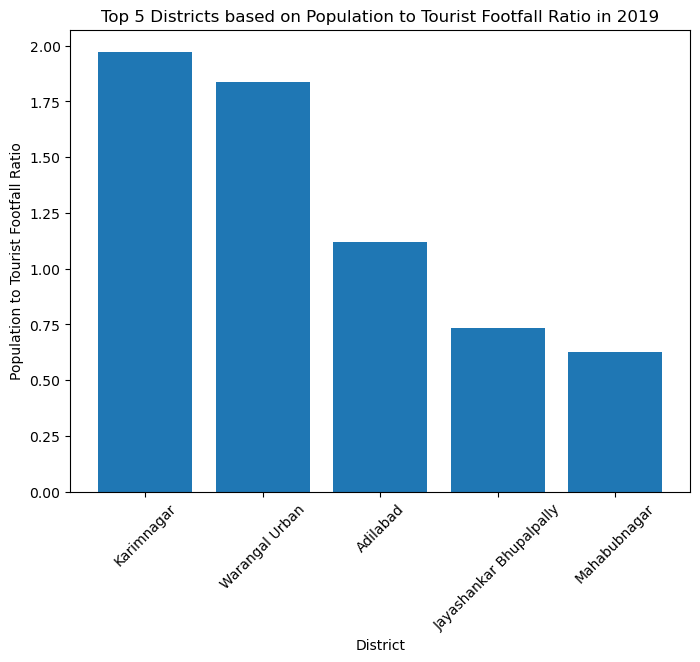

In [68]:
# Plotting the diagram
plt.figure(figsize=(8, 6))
plt.bar(top_districts['district'], top_districts['Population to Tourist Footfall Ratio'])
plt.xlabel('District')
plt.ylabel('Population to Tourist Footfall Ratio')
plt.title('Top 5 Districts based on Population to Tourist Footfall Ratio in 2019')
plt.xticks(rotation=45)
plt.show()

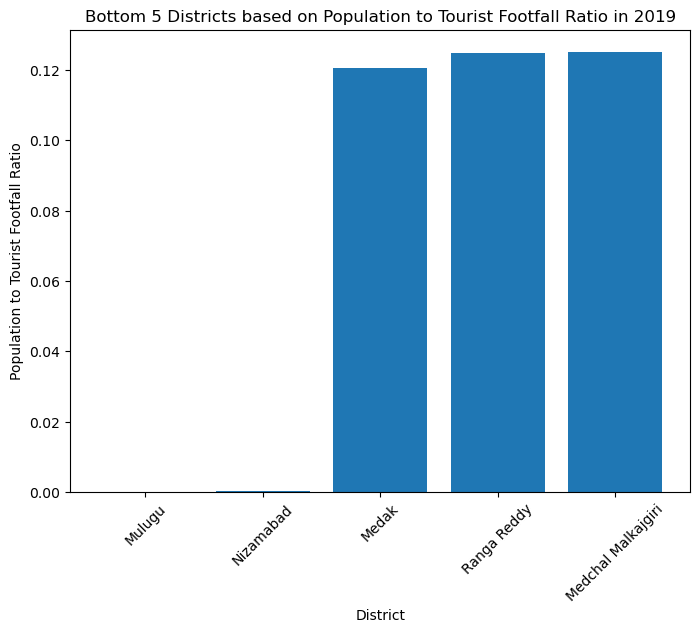

In [69]:
plt.figure(figsize=(8, 6))
plt.bar(bottom_districts['district'], bottom_districts['Population to Tourist Footfall Ratio'])
plt.xlabel('District')
plt.ylabel('Population to Tourist Footfall Ratio')
plt.title('Bottom 5 Districts based on Population to Tourist Footfall Ratio in 2019')
plt.xticks(rotation=45)
plt.show()

###### 7. What will be the projected number of domestic and foreign tourists in Hyderabad in 2025 based on the growth rate from previous years?

In [70]:
# Load historical data into a pandas DataFrame
merged_df = pd.read_csv(r'C:\Users\dell\merged_df.csv')

In [71]:
# Filter the data for years 2016 to 2019
filtered_df = merged_df[merged_df['year_x'].between(2016, 2019)]

In [72]:
# Calculate total domestic tourists for each year
domestic_tourists_by_year = filtered_df.groupby('year_x')['visitors_x'].sum()

In [73]:
# Calculate total foreign tourists for each year
foreign_tourists_by_year = filtered_df.groupby('year_x')['visitors_y'].sum()

In [74]:
# Calculate average annual growth rate for domestic tourists
domestic_growth_rate = (domestic_tourists_by_year.max() / domestic_tourists_by_year.min())**(1/len(domestic_tourists_by_year)) - 1

# Calculate average annual growth rate for foreign tourists
foreign_growth_rate = (foreign_tourists_by_year.max() / foreign_tourists_by_year.min())**(1/len(foreign_tourists_by_year)) - 1

In [75]:
# Calculate the projected number of domestic tourists in 2025
last_domestic_tourists = domestic_tourists_by_year.max()
projected_domestic_tourists = last_domestic_tourists * (1 + domestic_growth_rate) ** (2025 - domestic_tourists_by_year.index.max())
projected_domestic_tourists

16122041173.148243

In [76]:
# Calculate the projected number of foreign tourists in 2025
last_foreign_tourists = foreign_tourists_by_year.max()
projected_foreign_tourists = last_foreign_tourists * (1 + foreign_growth_rate) ** (2025 - foreign_tourists_by_year.index.max())
projected_foreign_tourists

16143477.603135806

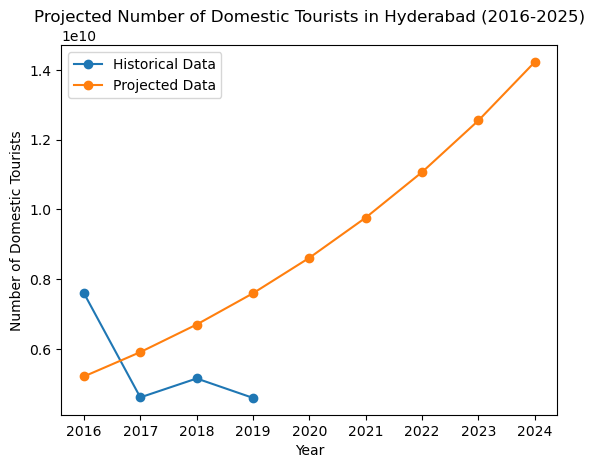

In [77]:
# Plotting historical data
years = domestic_tourists_by_year.index
domestic_tourists = domestic_tourists_by_year.values
plt.plot(years, domestic_tourists, marker='o', label='Historical Data')

# Plotting projected data
projected_years = list(range(2016, 2025))
projected_domestic_tourists = [last_domestic_tourists * (1 + domestic_growth_rate) ** (year - domestic_tourists_by_year.index.max()) for year in projected_years]
plt.plot(projected_years, projected_domestic_tourists, marker='o', label='Projected Data')

plt.xlabel('Year')
plt.ylabel('Number of Domestic Tourists')
plt.title('Projected Number of Domestic Tourists in Hyderabad (2016-2025)')
plt.legend()
plt.show()

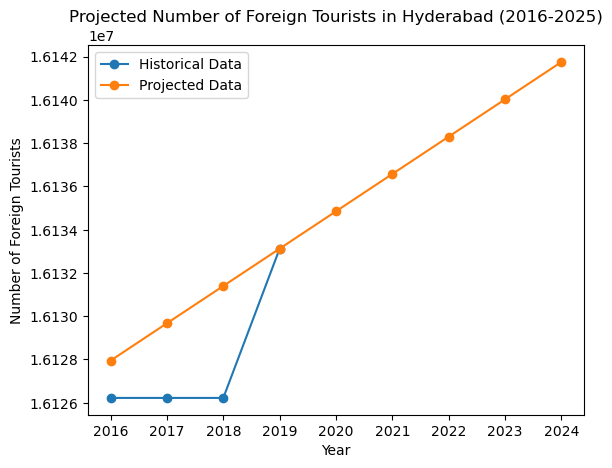

In [78]:
# Plotting historical data
years = foreign_tourists_by_year.index
foreign_tourists = foreign_tourists_by_year.values
plt.plot(years, foreign_tourists, marker='o', label='Historical Data')

# Plotting projected data
projected_years = list(range(2016, 2025))
projected_foreign_tourists = [last_foreign_tourists * (1 + foreign_growth_rate) ** (year - foreign_tourists_by_year.index.max()) for year in projected_years]
plt.plot(projected_years, projected_foreign_tourists, marker='o', label='Projected Data')

plt.xlabel('Year')
plt.ylabel('Number of Foreign Tourists')
plt.title('Projected Number of Foreign Tourists in Hyderabad (2016-2025)')
plt.legend()
plt.show()

###### 8. Estimate the projected revenue for Hyderabad in 2025 based on average spend per tourist (approximate data)

In [79]:
# Load historical data into a pandas DataFrame
merged_df = pd.read_csv(r'C:\Users\dell\merged_df.csv')

In [80]:
# Filter the data for Hyderabad and the years 2016 to 2019
hyderabad_data = merged_df[(merged_df['district'] == 'Hyderabad') & (merged_df['year_x'].between(2016, 2019))]

In [81]:
# Define the average revenue per tourist
average_revenue_foreign = 5600 # ₹5600 for foreign tourist
average_revenue_domestic = 1200 # ₹1200 for domestic tourist

In [82]:
# Calculate the total revenue for each year
hyderabad_data['total_revenue'] = hyderabad_data['visitors_x'] * average_revenue_domestic + hyderabad_data['visitors_y'] * average_revenue_foreign

C:\Users\dell\AppData\Local\Temp\ipykernel_18852\2235986600.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hyderabad_data['total_revenue'] = hyderabad_data['visitors_x'] * average_revenue_domestic + hyderabad_data['visitors_y'] * average_revenue_foreign


In [83]:
# Group the data by year and calculate the sum of total revenue
total_revenue_by_year = hyderabad_data.groupby('year_x')['total_revenue'].sum()

In [84]:
# Estimate the projected revenue for Hyderabad in 2025
projected_revenue_2025 = total_revenue_by_year.mean() * (2025 - hyderabad_data['year_x'].max()) + total_revenue_by_year.max()

In [85]:
# Print the projected revenue for Hyderabad in 2025
print("Projected revenue for Hyderabad in 2025: ₹", projected_revenue_2025)

Projected revenue for Hyderabad in 2025: ₹ 9304992902400.0


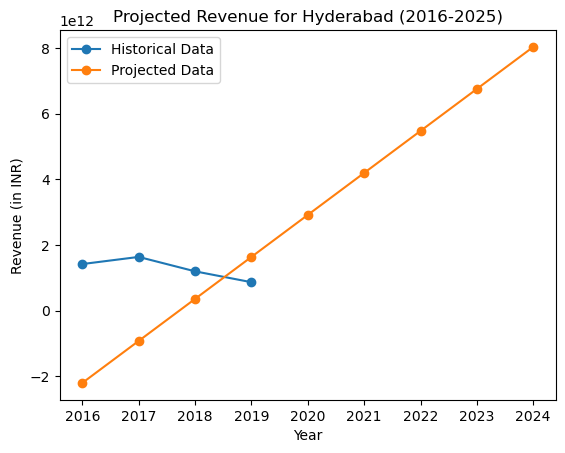

In [86]:
# Plotting historical data
years = total_revenue_by_year.index
revenue = total_revenue_by_year.values
plt.plot(years, revenue, marker='o', label='Historical Data')

# Plotting projected data
projected_years = list(range(2016, 2025))
projected_revenue = [total_revenue_by_year.mean() * (year - hyderabad_data['year_x'].max()) + total_revenue_by_year.max() for year in projected_years]
plt.plot(projected_years, projected_revenue, marker='o', label='Projected Data')

plt.xlabel('Year')
plt.ylabel('Revenue (in INR)')
plt.title('Projected Revenue for Hyderabad (2016-2025)')
plt.legend()
plt.show()